In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [37]:
train_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,9.499000e+03,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000,9499.000000
mean,7.395505e+08,46.396463,2.351827,36.003579,3.872197,2.342457,2.448784,8279.942320,1159.646700,7120.295621,0.759274,3820.983261,62.535109,0.709139,0.282694
std,3.708862e+07,7.991434,1.294992,7.945075,1.545098,1.013542,1.106834,8855.346201,811.649339,8858.007389,0.223490,2487.169768,21.705418,0.243467,0.279171
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130950e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2481.000000,398.000000,1212.000000,0.626000,2078.000000,44.000000,0.571000,0.024000
50%,7.180004e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4291.000000,1272.000000,3216.000000,0.734000,3742.000000,66.000000,0.696000,0.186000
75%,7.766992e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10338.000000,1776.000000,9199.500000,0.859500,4584.000000,79.000000,0.818000,0.519000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17628.000000,139.000000,3.714000,0.999000


In [38]:
train_df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [39]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [41]:
def preprocess_train(df):
    df=train_df.copy()
    
    df=df.drop('CLIENTNUM',axis=1)
    
    df = df.replace('Unknown', np.NaN)
    
    df['Education_Level']=df['Education_Level'].fillna('Graduate')
    df['Income_Category']=df['Income_Category'].fillna('Less than $40K')
    
    df = binary_encode(df, 'Attrition_Flag', positive_value='Attrited Customer')
    df = binary_encode(df, 'Gender', positive_value='M')
    
    education_order = [
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
    ]
    income_order = [
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'
    ]
    df = ordinal_encode(df, 'Education_Level', ordering=education_order)
    df = ordinal_encode(df, 'Income_Category', ordering=income_order)
    
    df = onehot_encode(df, 'Marital_Status', prefix='MS')
    df = onehot_encode(df, 'Card_Category', prefix='CC')
    
    
    y=df['Attrition_Flag'].copy()
    x=df.drop('Attrition_Flag',axis=1).copy()
    
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    
    return x,y

In [48]:
def preprocess_test(df):
    df=test_df.copy()
    
    df=df.drop('CLIENTNUM',axis=1)
    
    df = df.replace('Unknown', np.NaN)
    
    df['Education_Level']=df['Education_Level'].fillna('Graduate')
    df['Income_Category']=df['Income_Category'].fillna('Less than $40K')
    
    df = binary_encode(df, 'Gender', positive_value='M')
    
    education_order = [
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
    ]
    income_order = [
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'
    ]
    df = ordinal_encode(df, 'Education_Level', ordering=education_order)
    df = ordinal_encode(df, 'Income_Category', ordering=income_order)
    
    df = onehot_encode(df, 'Marital_Status', prefix='MS')
    df = onehot_encode(df, 'Card_Category', prefix='CC')
    
    
    x=df.copy()
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    
    return x

In [12]:
# train_df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [49]:
x_train,y_train=preprocess_train(train_df)
x_test=preprocess_test(test_df)

In [16]:
# y.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [54]:
 {column:list(x[column].unique()) for column in x.select_dtypes('object').columns}

{'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', nan, 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [51]:
x_test.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Income_Category             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
MS_Divorced                 0
MS_Married                  0
MS_Single                   0
CC_Blue                     0
CC_Gold                     0
CC_Platinum                 0
CC_Silver                   0
dtype: int64

In [28]:
# train_df['Income_Category'].mode()

0    Less than $40K
dtype: object

In [53]:
x_train

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MS_Divorced,MS_Married,MS_Single,CC_Blue,CC_Gold,CC_Platinum,CC_Silver
0,-0.174754,1.081303,0.500549,-0.894942,0.615159,0.377162,0.729962,-1.324590,0.498037,0.498150,...,-0.946132,3.761953,-0.794157,-0.282706,1.074911,-0.795419,0.251242,-0.098349,-0.041076,-0.224815
1,0.325808,-0.924810,2.045041,0.593729,-0.877026,1.006516,1.377204,-1.324590,-0.405488,-0.002704,...,-1.360797,12.342641,-0.636539,-0.282706,-0.930309,1.257199,0.251242,-0.098349,-0.041076,-0.224815
2,0.576089,1.081303,0.500549,0.593729,1.361252,-0.000451,0.082719,-1.324590,-2.212538,-0.549069,...,-1.959757,6.670104,-1.012672,-0.282706,1.074911,-0.795419,0.251242,-0.098349,-0.041076,-0.224815
3,-0.800457,-0.924810,1.272795,-0.894942,-0.877026,-0.252192,-0.564523,1.635482,-1.309013,-0.560927,...,-1.959757,6.670104,1.709815,-0.282706,-0.930309,-0.795419,0.251242,-0.098349,-0.041076,-0.224815
4,-0.800457,1.081303,0.500549,-1.639278,0.615159,-1.888512,0.729962,-1.324590,-2.212538,-0.402483,...,-1.591166,7.356066,-1.012672,-0.282706,1.074911,-0.795419,0.251242,-0.098349,-0.041076,-0.224815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9494,-2.177003,1.081303,-1.043943,0.593729,1.361252,-0.000451,-1.859007,-0.337899,-1.309013,2.962892,...,2.463334,0.422509,-0.840726,-0.282706,1.074911,-0.795419,-3.980226,-0.098349,-0.041076,4.448096
9495,-1.801582,-0.924810,-1.816189,-0.894942,-0.877026,-1.385029,-1.211765,0.648792,-2.212538,0.064491,...,2.186891,0.636102,-0.303392,3.537243,-0.930309,-0.795419,0.251242,-0.098349,-0.041076,-0.224815
9496,0.701230,-0.924810,-1.043943,-0.150607,-0.877026,0.377162,-1.859007,-0.337899,-1.309013,0.025529,...,2.325113,-0.292206,-1.012672,-0.282706,-0.930309,-0.795419,0.251242,-0.098349,-0.041076,-0.224815
9497,0.200668,1.081303,-0.271697,0.593729,-0.877026,-0.000451,-1.859007,0.648792,-0.405488,-0.546359,...,1.726153,0.061044,0.266181,3.537243,-0.930309,-0.795419,0.251242,-0.098349,-0.041076,-0.224815


In [55]:
eda_df = pd.concat([x_test.loc[:, ['Customer_Age', 'Months_on_book']], x_test.loc[:,'Credit_Limit':'Avg_Utilization_Ratio']], axis=1).copy()

In [56]:
eda_df

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.690060,1.317604,-0.577473,0.791061,-0.639823,0.309589,0.915516,1.141968,-0.299242,0.487150
1,0.089009,-0.328137,-0.742189,-1.403764,-0.628594,-1.181698,0.323905,0.761236,-0.429108,-0.877635
2,0.209219,0.259627,0.721106,0.879179,0.649533,1.253351,0.014860,0.190139,-1.086554,-0.368638
3,-1.593934,-2.326538,-0.983965,0.370184,-1.011948,0.417654,0.067175,0.856419,0.455603,1.661760
4,0.569850,0.377180,-0.409969,-0.290699,-0.386016,-0.432452,0.318738,0.523279,-0.826823,-0.312704
...,...,...,...,...,...,...,...,...,...,...
623,0.569850,0.612286,-0.925217,0.742365,-0.983088,-0.482882,0.727247,0.808828,0.796502,1.706507
624,-0.512042,-1.151008,-0.899748,1.130778,-0.988748,0.244751,-1.440269,-1.475563,-0.615790,1.980583
625,-0.151411,0.142074,-0.794523,-1.403764,-0.680840,0.352815,-0.947153,-1.903886,0.479953,-0.877635
626,-1.834355,0.142074,-0.806421,-1.403764,-0.692718,-1.693203,-1.559431,-1.808703,-0.299242,-0.877635


D:\Users\me\anaconda3\envs\dlf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Users\me\anaconda3\envs\dlf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Users\me\anaconda3\envs\dlf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Users\me\anac

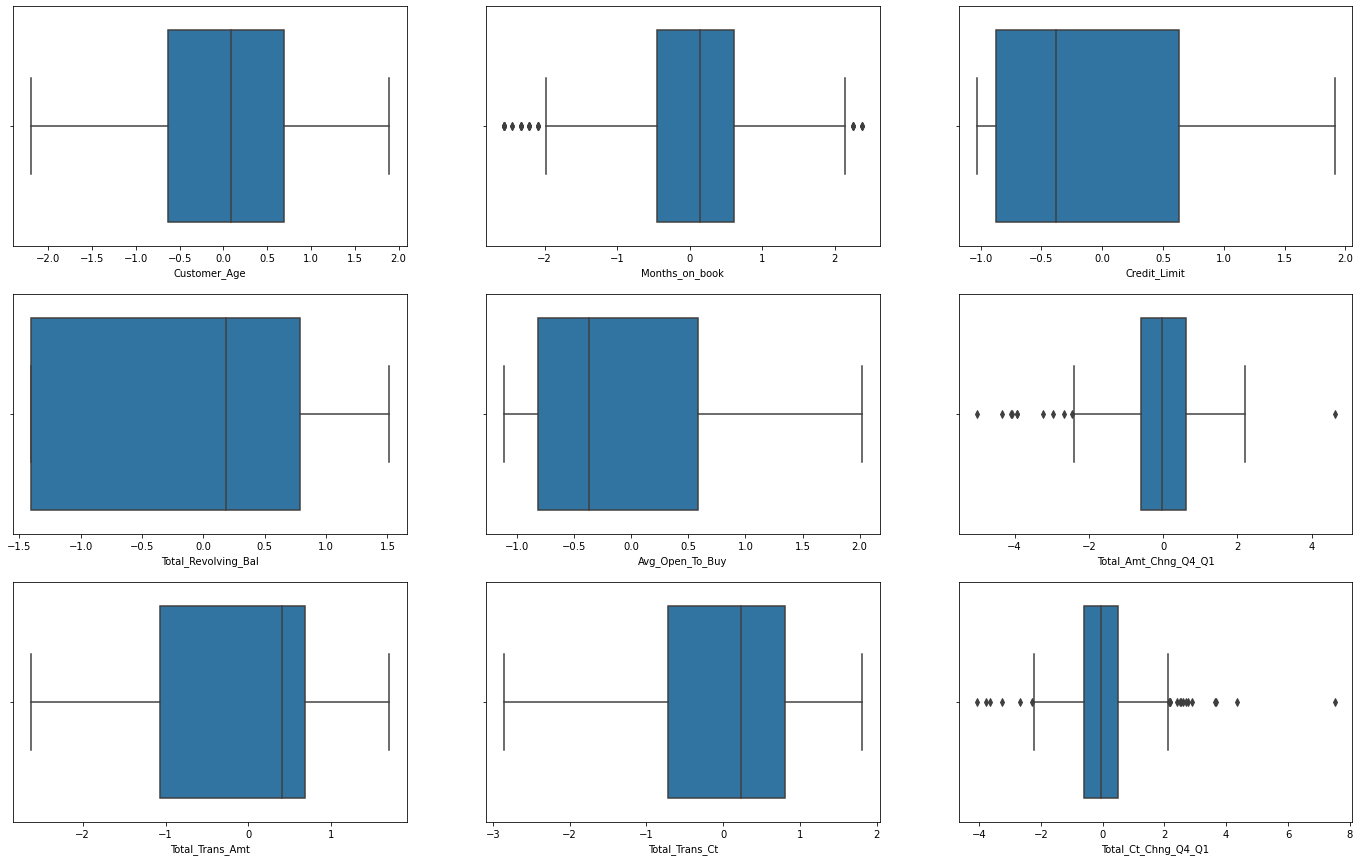

In [58]:
plt.figure(figsize=(24, 15))

for i in range(len(eda_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

D:\Users\me\anaconda3\envs\dlf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\me\anaconda3\envs\dlf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\me\anaconda3\envs\dlf\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

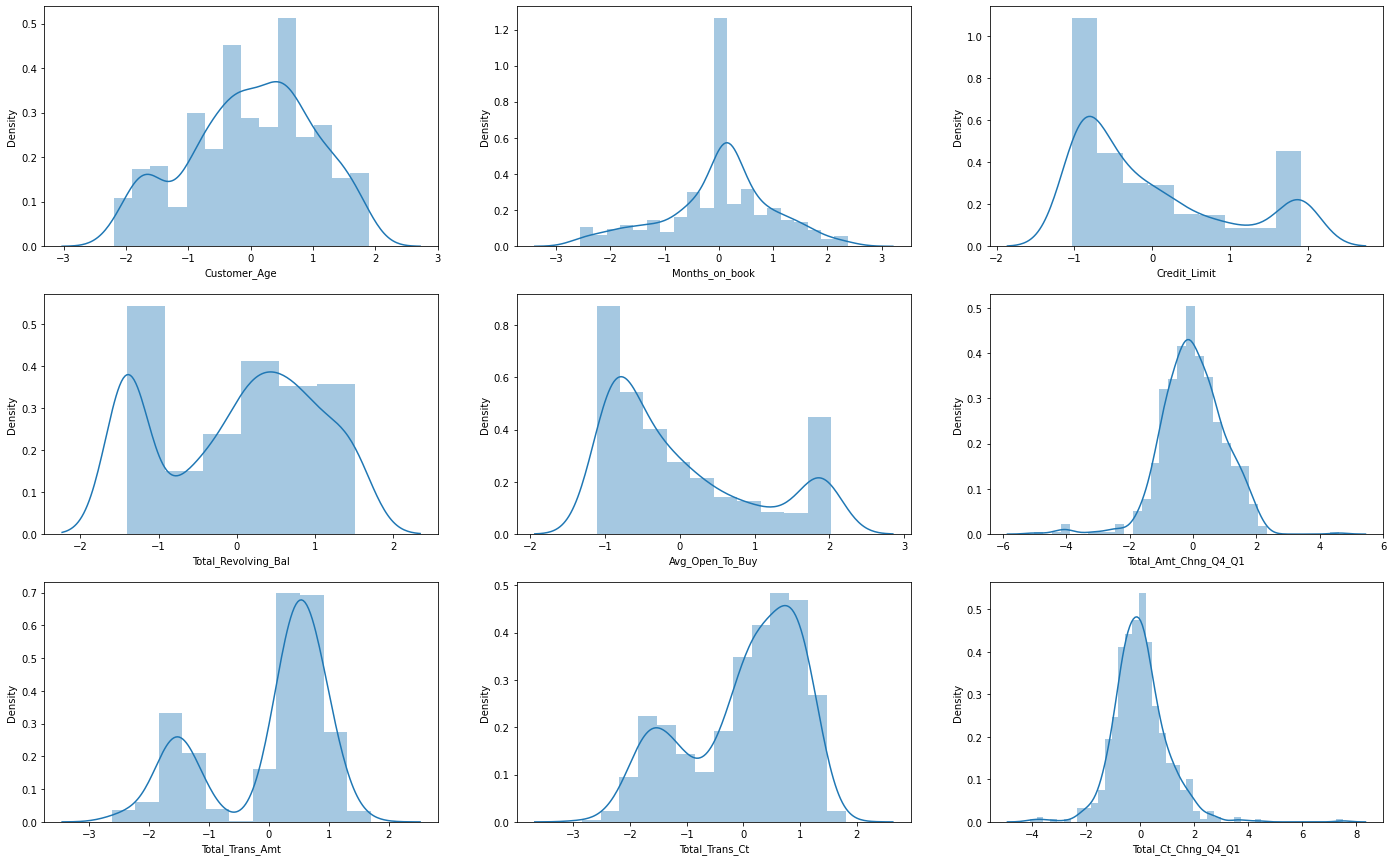

In [59]:
plt.figure(figsize=(24, 15))

for i in range(len(eda_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.distplot(eda_df[eda_df.columns[i]])

plt.show()

<Figure size 1440x1440 with 0 Axes>

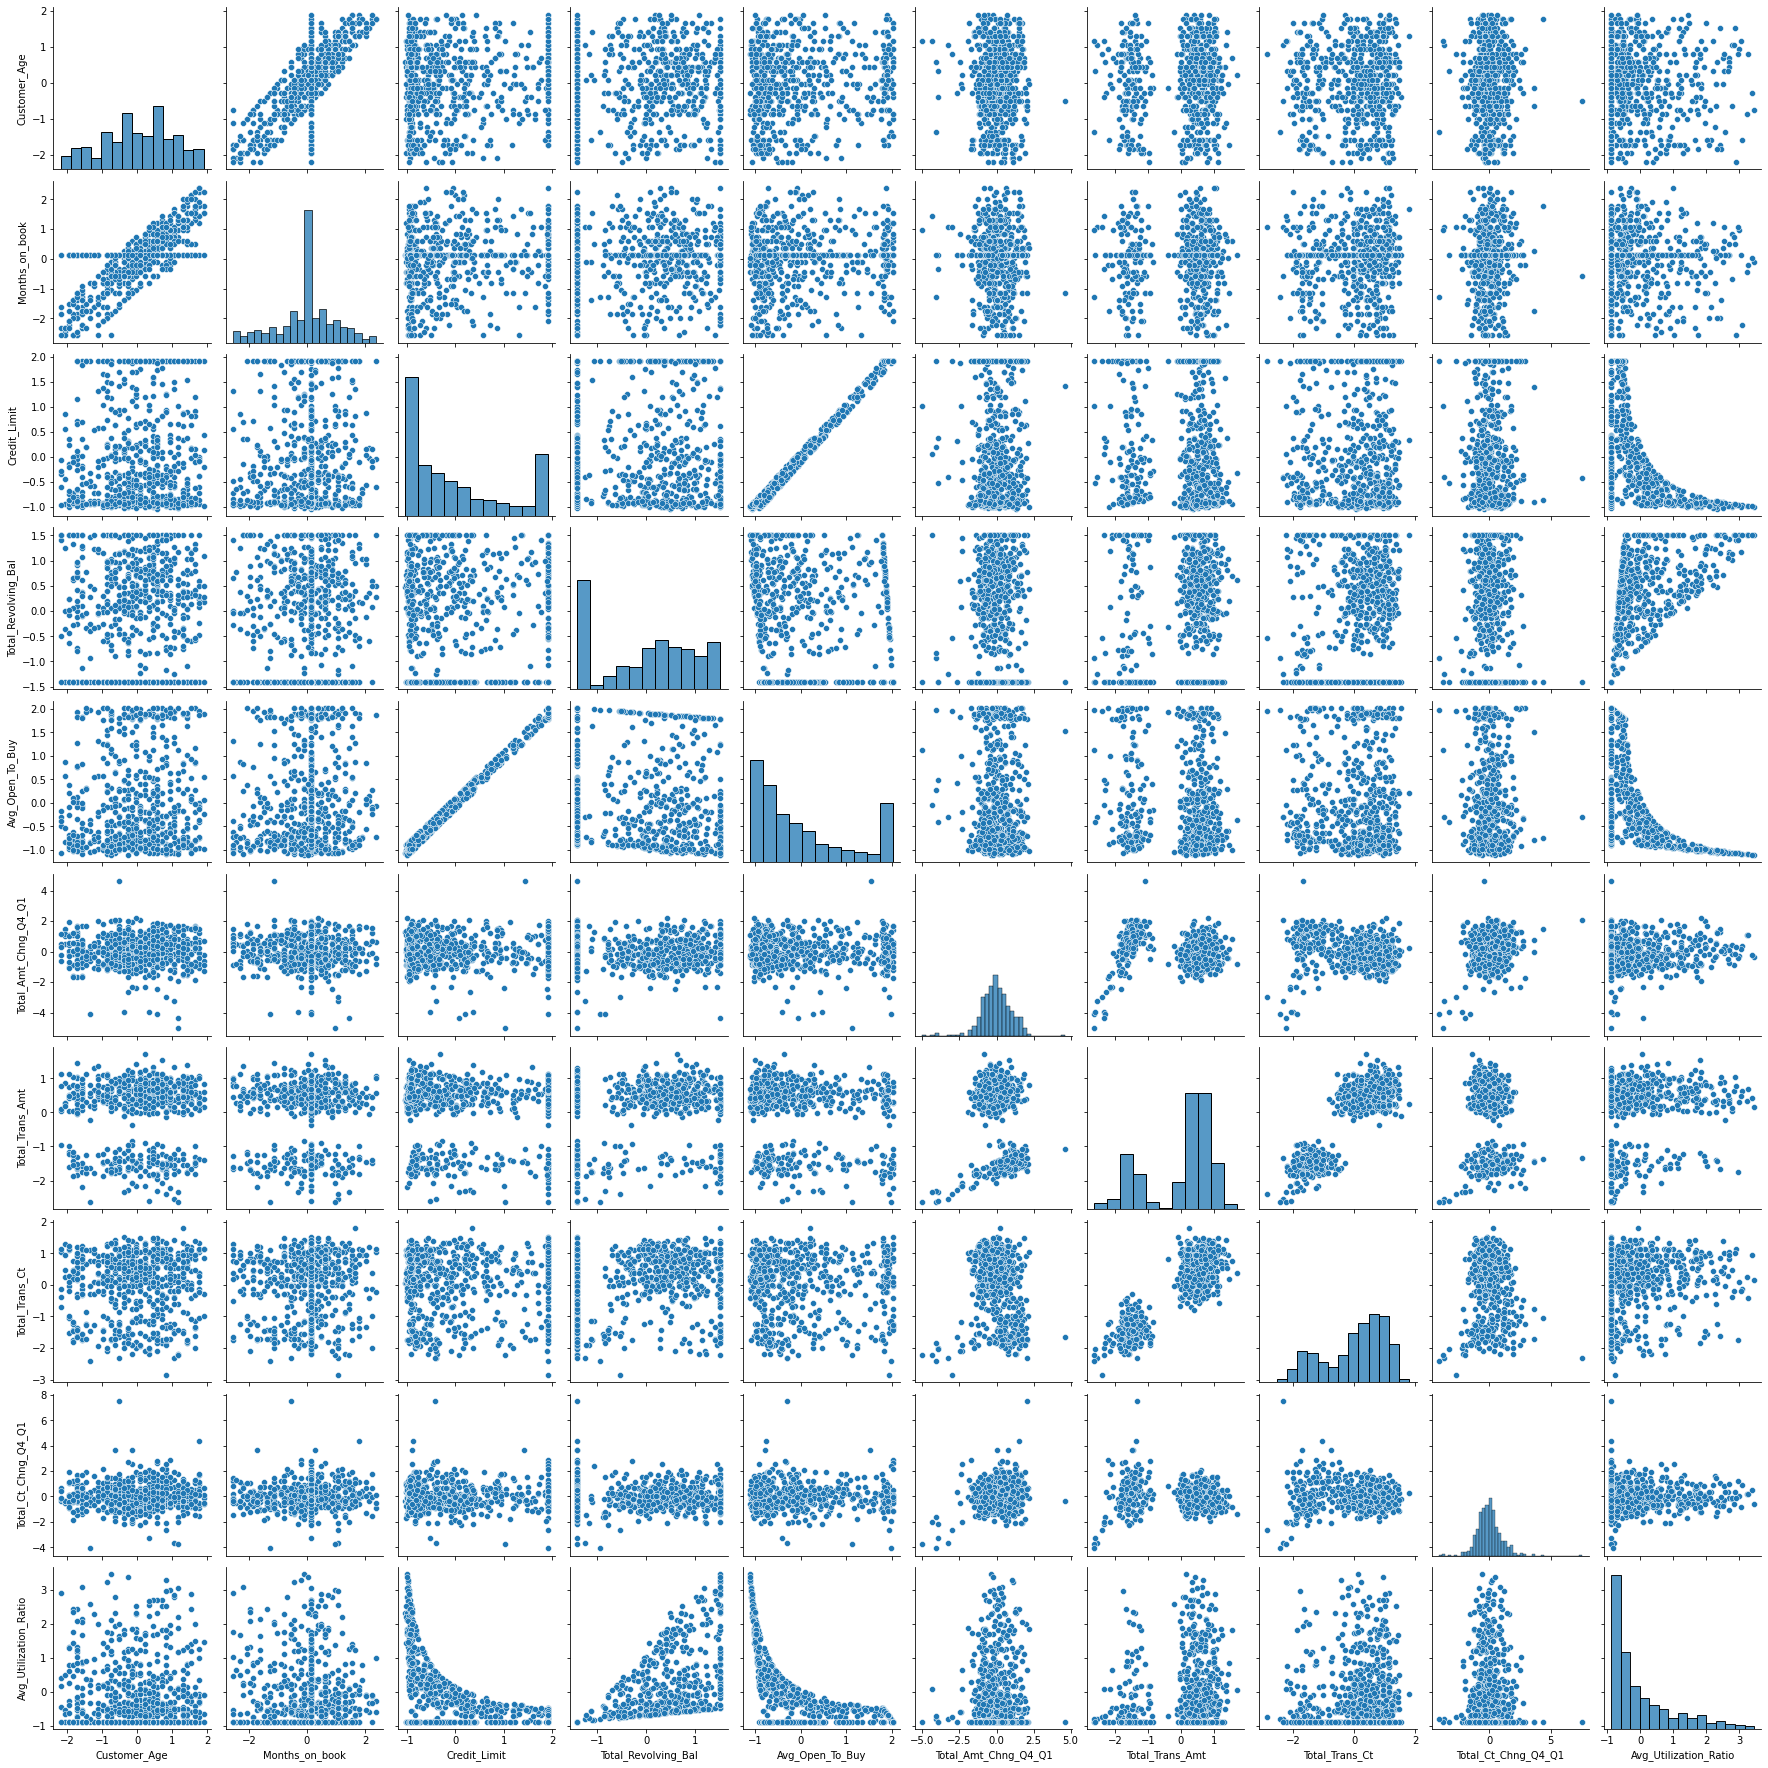

In [60]:
plt.figure(figsize=(20, 20))
sns.pairplot(eda_df)
plt.show()

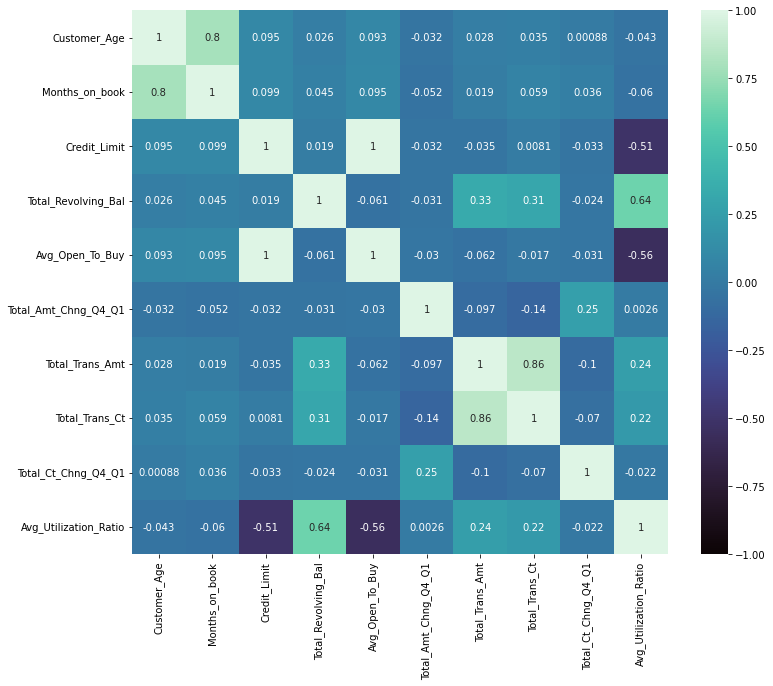

In [61]:
corr = pd.concat([eda_df, y], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [62]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(x_train, y_train)

D:\Users\me\anaconda3\envs\dlf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [63]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(x_train, y_train) * 100))

   Logistic Regression: 91.0622%
Support Vector Machine: 94.6100%
         Decision Tree: 100.0000%
        Neural Network: 98.2946%
         Random Forest: 99.9895%


In [73]:
model= SVC()
model.fit(x_train,y_train)
preds=model.predict(x_test)
preds_df=pd.DataFrame(preds,columns=['Predicted_encode'])
preds_df['Predicted_Attritions']=preds_df.apply(lambda x: ('Existing customer' if x['Predicted_encode']==0 else 'Attrited Customer'),axis=1)
preds_df

,Predicted_encode,Predicted_Attritions
0,0,Existing customer
1,0,Existing customer
2,0,Existing customer
3,0,Existing customer
4,0,Existing customer
...,...,...
623,0,Existing customer
624,0,Existing customer
625,1,Attrited Customer
626,1,Attrited Customer


In [78]:
preds_df=preds_df.drop('Predicted_encode',axis=1)


In [79]:
final_df=pd.concat([x_test,preds_df],axis=1)
final_df

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MS_Divorced,MS_Married,MS_Single,CC_Blue,CC_Gold,CC_Platinum,CC_Silver,Predicted_Attritions
0,0.690060,-1.280100,-0.192883,0.588409,-1.064205,1.317604,-1.356023,3.811051,0.408217,-0.577473,...,-0.299242,0.487150,-0.277825,1.114835,-0.846077,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
1,0.089009,0.781189,-0.192883,-0.875040,-0.353981,-0.328137,-0.646371,0.702817,-0.507355,-0.742189,...,-0.429108,-0.877635,-0.277825,-0.896994,1.181925,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
2,0.209219,0.781189,-0.192883,0.588409,1.066467,0.259627,-1.356023,-0.333261,-0.507355,0.721106,...,-1.086554,-0.368638,3.599383,-0.896994,-0.846077,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
3,-1.593934,0.781189,-0.931484,-1.606765,1.066467,-2.326538,-0.646371,-0.333261,-1.422928,-0.983965,...,0.455603,1.661760,-0.277825,-0.896994,1.181925,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
4,0.569850,-1.280100,-0.192883,0.588409,-1.064205,0.377180,-0.646371,-1.369339,-1.422928,-0.409969,...,-0.826823,-0.312704,-0.277825,1.114835,-0.846077,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0.569850,0.781189,-0.192883,0.588409,-0.353981,0.612286,0.063281,-0.333261,0.408217,-0.925217,...,0.796502,1.706507,-0.277825,-0.896994,1.181925,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
624,-0.512042,0.781189,-0.192883,0.588409,-0.353981,-1.151008,0.772933,-0.333261,0.408217,-0.899748,...,-0.615790,1.980583,3.599383,-0.896994,-0.846077,0.503481,-0.203616,-0.080064,-0.430007,Existing customer
625,-0.151411,-1.280100,-0.931484,-0.875040,-1.064205,0.142074,1.482585,0.702817,1.323790,-0.794523,...,0.479953,-0.877635,-0.277825,1.114835,-0.846077,0.503481,-0.203616,-0.080064,-0.430007,Attrited Customer
626,-1.834355,0.781189,-0.192883,0.588409,-0.353981,0.142074,0.772933,0.702817,0.408217,-0.806421,...,-0.299242,-0.877635,-0.277825,-0.896994,-0.846077,0.503481,-0.203616,-0.080064,-0.430007,Attrited Customer


In [81]:
final_df.to_csv('predictions.csv')